<a href="https://colab.research.google.com/github/ae-98/mnist-recogintion-deepLearning/blob/main/__main__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files


In [3]:
 ! mkdir kaggle

mkdir: cannot create directory ‘kaggle’: File exists


In [4]:
%cd /root/.kaggle

/root/.kaggle


In [5]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"aerrkhis","key":"7ef80b4f73a1815ce4340cfcf2b73113"}'}

In [6]:
!kaggle datasets download -d oddrationale/mnist-in-csv

mnist-in-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

'kaggle (1).json'   kaggle.json   mnist-in-csv.zip   youtube-new.zip


In [8]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('mnist-in-csv.zip') # having First.csv zipped file.
df = pd.read_csv(zf.open('mnist_train.csv'))

dfT = pd.read_csv(zf.open('mnist_train.csv'))

info = df.iloc[:,1:]
label = df.iloc[:,0]

infoT = dfT.iloc[:,1:]
from keras.utils import to_categorical
#label = to_categorical(label,num_classes=10)

label = to_categorical(label,num_classes=10)
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
info.shape

(60000, 784)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape=(784,),activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

model.fit(info,label,epochs=60)

Epoch 1/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1955 - accuracy: 0.7684
Epoch 2/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9073
Epoch 3/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9262
Epoch 4/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0381 - accuracy: 0.9381
Epoch 5/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9457
Epoch 6/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0305 - accuracy: 0.9522
Epoch 7/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0281 - accuracy: 0.9561
Epoch 8/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0260 - accuracy: 0.9587
Epoch 9/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9627
Epoch 10/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.022

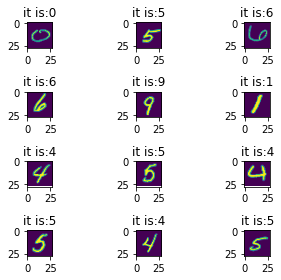

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random 
fig,axe=plt.subplots(4,3)
for row in axe:
  for col in row:
    r=random.randrange(1000)
    col.imshow(infoT.iloc[r,:].values.reshape(28,28))
    col.set_title("it is:"+str(np.argmax(model.predict(infoT.iloc[r,:].values.reshape(1,784)))))
    fig.tight_layout()